# <center>Computational Systems Biology</center>

## <center>Gene Regulatory Circuits Exercises</center>
#### <center> Ferran Pegenaute, ferran.pegenaute01@estudiant.edu.upf</center>


### Table of Content

* [Exercise 1](#Exercise-1)
* [Exercise 2](#Exercise-2)
* [Exercise 3](#Exercise-3)
    * [Changing the basal expression rate of ComK (αk)](#change-ak)
    * [Changing the basal expression rate of ComS (αs)](#change-as)
    * [Changing unrepressed expression rate of ComS (βs)](#change-bs)


### Exercise 1 <a class="anchor" id="Exercise-1"></a>

**Consider a gene whose expression is affected by a direct positive feedback, with Hill coefficient 2, maximum expression rate 1 nM/s, activation threshold 100 nM, and degradation rate 0.001 s-1. Integrate the differential equation that represents the dynamics of the concentration of the expressed protein, and determine the threshold value of the initial condition that separates the basins of attraction of the two coexisting equilibrium states of the system.**


In [1]:
import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt
from IPython.display import Image

First, store the values given in the exercise in the corresponding variables:

In [2]:
# Hill coefficient
n=2
# Maximum expression rate
b=1
# Activation threshold
K = 100
# Degradation rate
y=0.001

Let's define the function which return dx/dt:

In [3]:
def dx_dt(x,t):
    """
    Positive feedback model, Hill cooperativity. Ex1
    """
    dxdt = ((b*x**n)/(K**n+ x**n))-y*x
    return dxdt

Now define the time intervals and the initial conditios X0.

In [4]:
#time state
t = np.linspace(0, 15000, 1000)

x0=[9, 10, 11,1000]


Plot x in function of the time for each initial condition. In this exercises, the integration will be done with scipy.integrate.odeint, which takes three arguments in this occasion: a function name that returns derivative values at requested y and t values (dx_dt), the initial conditions of the differential states (x), and the time points at which the solution should be reported (t):

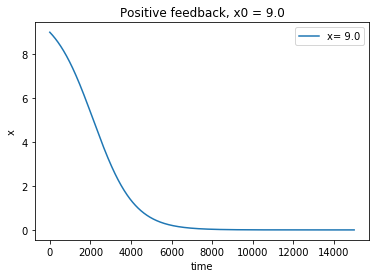

The function tends to the value:  0.0


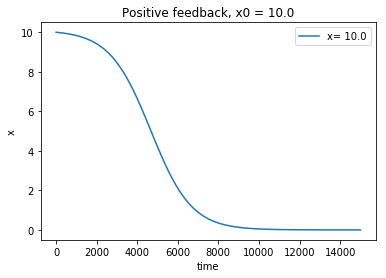

The function tends to the value:  0.0003

 **Now look what happens**


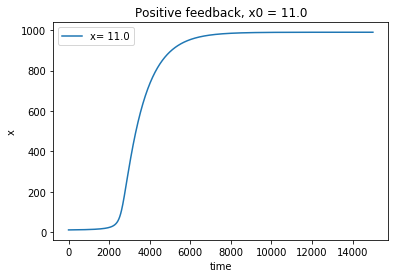

The function tends to the value:  989.8926


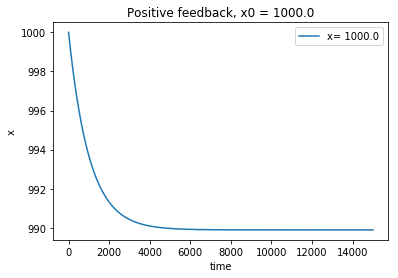

The function tends to the value:  989.898


In [5]:
for x in x0:
    y0 = odeint(dx_dt, x, t)
    plt.plot(t, y0)
    plt.xlabel('time')
    plt.ylabel('x')
    plt.legend(["x= %.1f" %x])
    if x == 11:
        print("\n **Now look what happens**")
    plt.title('Positive feedback, x0 = %.1f'%x)
    plt.show()
    len_y0=len(y0)
    print("The function tends to the value: ", round(float(y0[len_y0-1]),4))

The plots show two equilibrium points: one around 0 nM and 989.898 nM approximately. Note that, when the starting concentration is larger than the second equilibrium point, it will decrease, and if it is smaller (but larger that 10 aprox.) it will increase, which it is expected from an attractor point.

The threshold value lies between 10 and 11 approximately, as showed above. We can try to close up alittle bit more in that interval:


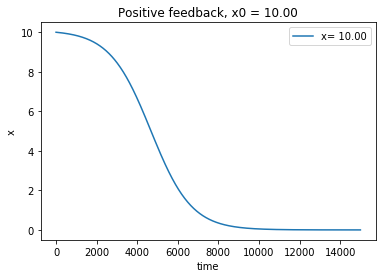

The function tends to the value:  0.0003


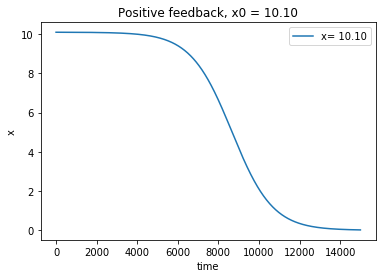

The function tends to the value:  0.0179


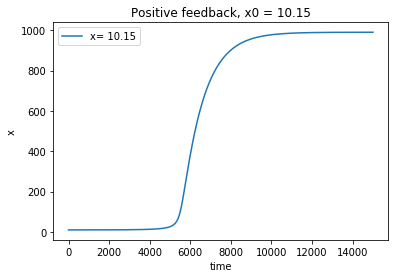

The function tends to the value:  989.8047

 **Now look what happens**


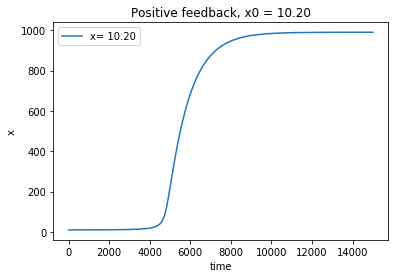

The function tends to the value:  989.8521


In [6]:
x0=[10, 10.1, 10.15, 10.2,]
for x in x0:
    y0 = odeint(dx_dt, x, t)
    plt.plot(t, y0)
    plt.xlabel('time')
    plt.ylabel('x')
    plt.legend(["x= %.2f" %x])
    if x == 10.2:
        print("\n **Now look what happens**")
    plt.title('Positive feedback, x0 = %.2f'%x)
    plt.show()
    len_y0=len(y0)
    print("The function tends to the value: ", round(float(y0[len_y0-1]),4))

he threshold lies between 10.1 and 10.2.

### Exercise 2 <a class="anchor" id="Exercise-2"></a>
**Consider the following activator-repressor model discussed in class (slide titled “From oscillations to pulses”):**
<img src="ex2.png"/>

**Simulate this model for the following parameter values: a2=0.025 nM/s, b1=15 nM/s, b2=0.8 nM/s, d1=d2=5·10-5 s-1, g=2.5·10-7 nM-1s-1, K1=3000 nM, K2=750 nM, and n=m=2. Vary a1 as shown in the slides. Reproduce the dynamics obtained there.**


The setup is similar as before, but more complex:

In [7]:
a2 = 0.025
b1 = 15
b2 = 0.8
d1 = d2 = 5*10**(-5)
g = 2.5*10**(-7)
K1 = 3000
K2 = 750
n = m = 2
y = 0.001
x = 3


# Note that now we need to return dx/dt and dy/dt
def dx_dy(y, t,a1):
    """
    Activator-repressor model from class. Ex2
    """
    x, y = y[0], y[1]
    
    dxdt = (a1+((b1*x**n)/(K1**n + x**n)))-g*x*y-d1*x
    dydt = (a2+((b2*x**m)/(K2**m + x**m)))-d2*y

    return [dxdt, dydt]

Set the initial state (y0 and time stamps).

In [8]:
y0 = [1, 2]
t = np.linspace(0, 1000000,1000)

And plot

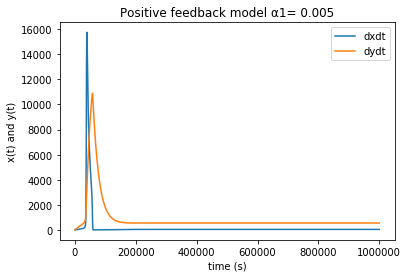

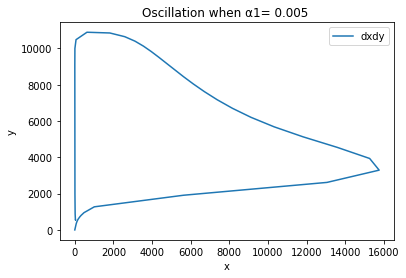

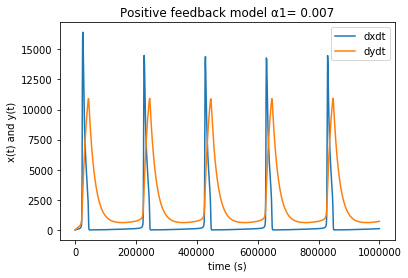

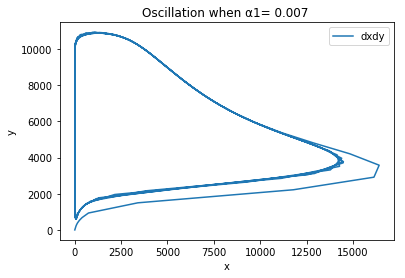

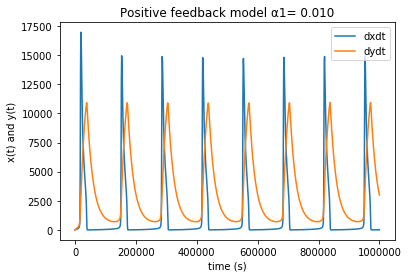

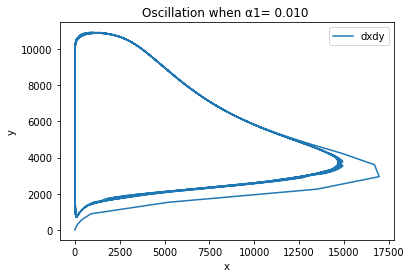

In [9]:
a1=[0.005,0.007,0.01]

for a in a1:
    
    y1 = odeint(dx_dy, y0, t, args=(a,))  
    dx= y1[:,0]
    dyy=y1[:,1]
    plt.plot(t, dx)
    plt.plot(t, dyy)
    plt.xlabel('time (s)')
    plt.ylabel('x(t) and y(t)')
    plt.legend(["dxdt","dydt"])
    plt.title('Positive feedback model α1= %.3f'%a)
    plt.show()
    
    #oscillation
    plt.plot(dx,dyy)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(["dxdy"])
    plt.title('Oscillation when α1= %.3f '%a)
    plt.show()


See how when a1 is 0.005, the syste does not oscillate, but it begins to do so with the next two values of a1. 


### Exercise 3.  <a class="anchor" id="Exercise-3"></a>
**The following model describes genetic competence in B. subtilis:**

<img src="ex3.png"/>


**Simulate this model for the parameter values given in the table below:**

<img src="ex3_2.png"/>


**Next, vary the parameters 𝛼k, 𝛼s and 𝛽s (one at a time) and study the response of the system in the different situations. Reproduce the different dynamical regimes studied in class.**


**REWRITE FROM HERE**

The K and S represent the concentrations of ComK and ComS in the cell, respectively. 
Their basal expression is represented by the following variables:
* αk: Basal expression rate of ComK
* αs: Basal expression rate of ComS, 
maximum rate of regulated expression:

* βk: Saturating expression rate of ComK positive feedback
* βs: Unrepressed expression rate of ComS 



In [10]:
bk = 7.5
dk = ds = 1*10**(-4)
kk = 5000
ks = 833
yk = ys = 0.001
Tk = 25000
Ts = 20
n = 2
p = 5
ak = 0.0875
a_s = 0.0004

def dK_dS(y, t,a_k,a_s,bs):
    """
    Genetic competence of B Subtilis. Ex3
    """
    K, S = y[0], y[1]
    
    dKdt = (a_k+((bk*K**n)/(kk**n + K**n)))-((yk*K)/(1+(K/Tk)+(S/Ts)))-dk*K
    dSdt = (a_s+(bs/(1 + (K/ks)**p)))-((ys*S)/(1+(K/Tk)+(S/Ts)))-ds*S

    return [dKdt, dSdt]

Setting up:

In [11]:
y0 = [1, 0.1]
t = np.linspace(0, 1000000,1000)

And now solve it:

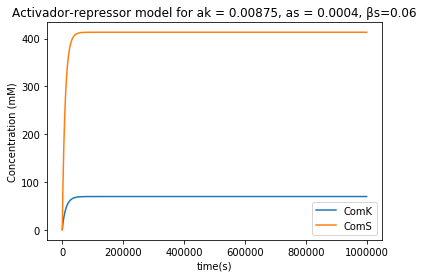

[ComS] tents to the value:  413.255
[ComK] tents to the value:  69.892


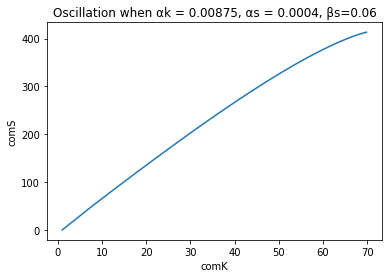

In [12]:
a_k = 0.00875
a_s = 0.0004
bs = 0.06
y1 = odeint(dK_dS, y0, t,args=(a_k,a_s,bs))
dK= y1[:,0]
dS=y1[:,1]


plt.plot(t, dK)
plt.plot(t, dS)
plt.xlabel('time(s)')
plt.ylabel('Concentration (mM)')
plt.legend(["ComK","ComS"])
plt.title('Activador-repressor model for ak = 0.00875, as = 0.0004, βs=0.06')
plt.show()
len_yS=len(dS)
len_yK=len(dK)
print("[ComS] tents to the value: ", round(float(dS[len_yS-1]),3))
print("[ComK] tents to the value: ", round(float(dK[len_yK-1]),3))

plt.plot(dK,dS)
plt.xlabel('comK')
plt.ylabel('comS')
plt.title('Oscillation when αk = 0.00875, αs = 0.0004, βs=0.06')


plt.show()



### Changing the basal expression rate of ComK (αk) value. <a class="anchor" id="change-ak"></a> 

#### When ak= 0.000875, 0.0875, 0.875, 2 and 10

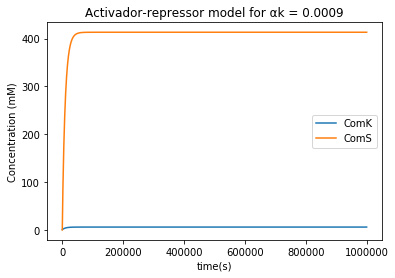

When αk = 0.0009
[ComS] tents to the value:  413.235
[ComK] tents to the value:  6.062


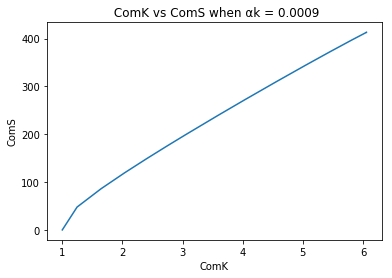

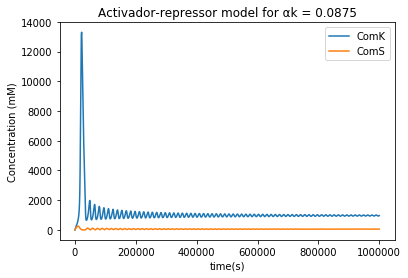

When αk = 0.0875
[ComS] tents to the value:  57.738
[ComK] tents to the value:  966.31


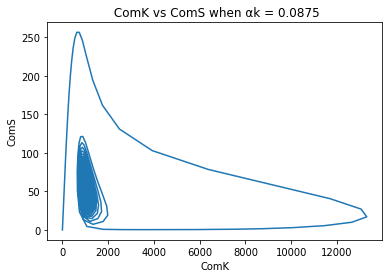

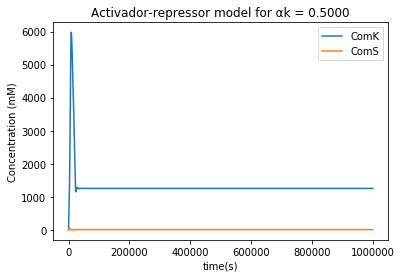

When αk = 0.5000
[ComS] tents to the value:  9.642
[ComK] tents to the value:  1254.614


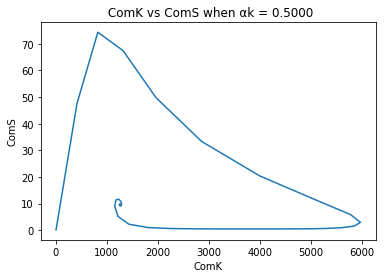

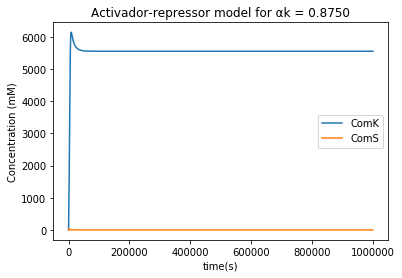

When αk = 0.8750
[ComS] tents to the value:  0.448
[ComK] tents to the value:  5548.956


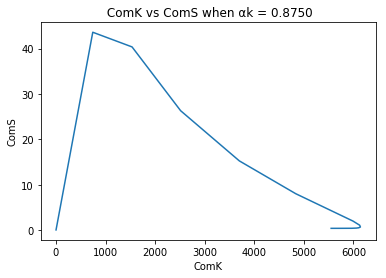

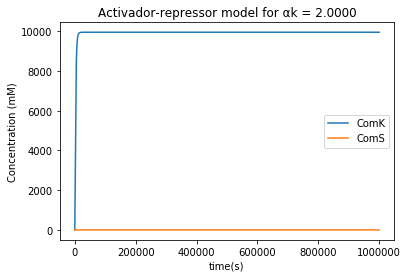

When αk = 2.0000
[ComS] tents to the value:  0.499
[ComK] tents to the value:  9950.873


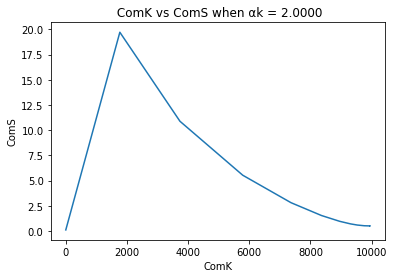

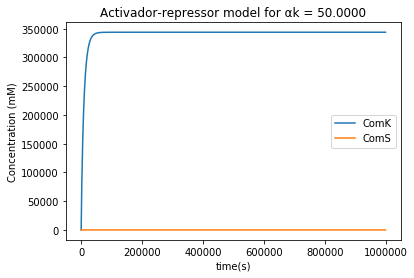

When αk = 50.0000
[ComS] tents to the value:  2.392
[ComK] tents to the value:  343804.813


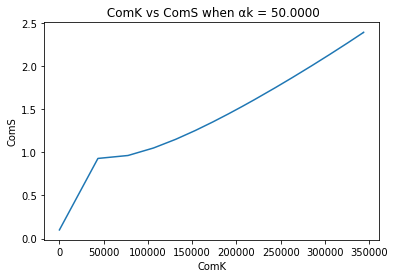

In [13]:
a_k = [0.000875,0.0875,0.5,0.875,2,50]

for ak in a_k:
    a_s = 0.0004
    bs = 0.06

    y1 = odeint(dK_dS, y0, t, args=(ak, a_s,bs))
    dK = y1[:, 0]
    dS = y1[:, 1]
    plt.plot(t, dK)
    plt.plot(t, dS)
    plt.xlabel('time(s)')
    plt.ylabel('Concentration (mM)')
    plt.legend(["ComK","ComS"])
    plt.title('Activador-repressor model for αk = %.4f'%ak)
    plt.show()
    len_yS=len(dS)
    len_yK=len(dK)
    print("When αk = %.4f" %ak)
    print("[ComS] tents to the value: ", round(float(dS[len_yS-1]),3))
    print("[ComK] tents to the value: ", round(float(dK[len_yK-1]),3))


    plt.plot(dK, dS)
    plt.xlabel('ComK')
    plt.ylabel('ComS')
    plt.title(' ComK vs ComS when αk = %.4f' % ak)

    plt.show()

In this system we have the combination of possitive and negative feedback, ComK and ComS respectivelly.

Observing the plot above, we can notice that when the basal expression rate of ComK gets lower the concentration of ComS does not change whereas the concentration of ComK gets lower as well. For instance, when:
αk = 0.00875 and αk = 0.0009 the concentration of ComS is 413.235 mM. This may be the reason that there are not oscillation behavior of the system since the ComS is supressing the expression of ComK in a negative feedback. That stable fixed point corresponds to the vegetative state.

However when the basal expression rate of ComK gets higher values ( αk = 0.0875 to 0.875) we can notice that the concentration of ComS decrease significantly (from 57.728 to 0.448) while the concentration on ComK gets much higher (from 966.518 to 5548.956 mM). These may be because the ComS is not expressed enough to inhibit the expression of ComK. Also, we can see that within these values the system is unstable. The system exhibits limit cycle oscillations between a mid-ComK and a high-ComK level. In this case oscillation of the system is clearer to see. In contrast, with lower values of αk there are not oscillation, we can see that the curve tends to the 400 mM and there not a recirculation of the reaction. But when αk get higher values than 0.5 the oscillation dissapear and the system reach a higher concentration of ComK but it stays in a stable state whitout concentration changes in ComS and ComK.


### Changing the basal expression rate of ComS (αs) value <a class="anchor" id="change-as"></a> 

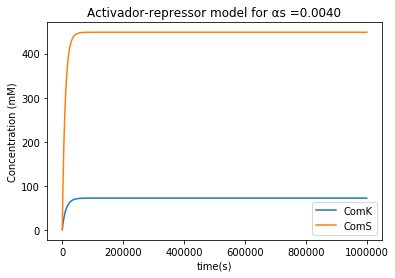

When αs = 0.0040
[ComS] tents to the value:  448.558
[ComK] tents to the value:  72.322


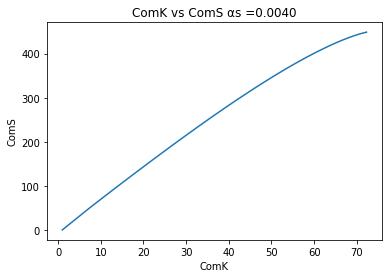

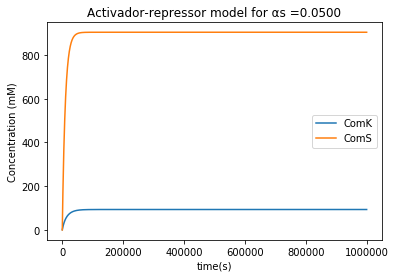

When αs = 0.0500
[ComS] tents to the value:  904.333
[ComK] tents to the value:  93.482


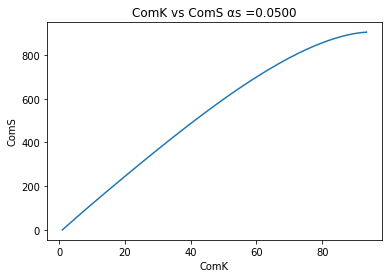

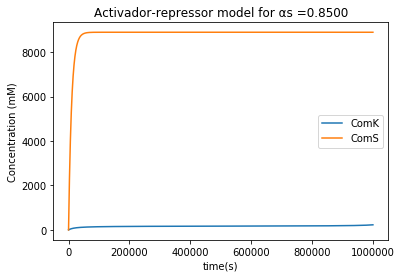

When αs = 0.8500
[ComS] tents to the value:  8899.643
[ComK] tents to the value:  229.975


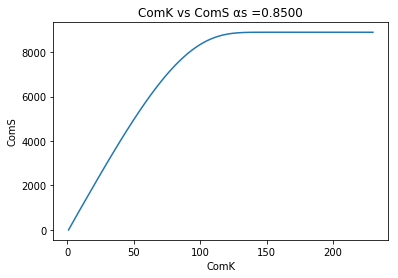

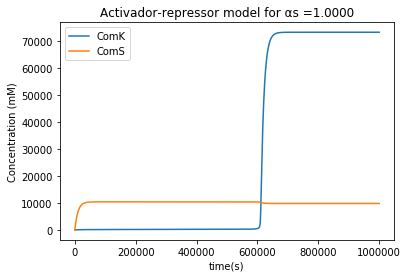

When αs = 1.0000
[ComS] tents to the value:  9801.591
[ComK] tents to the value:  73256.832


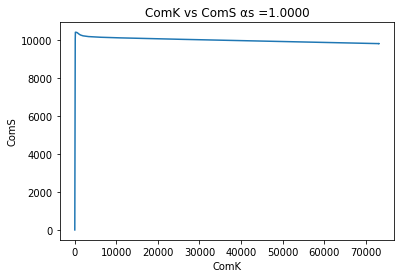

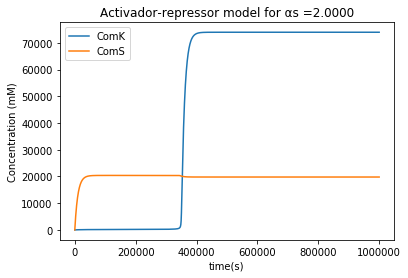

When αs = 2.0000
[ComS] tents to the value:  19800.797
[ComK] tents to the value:  74002.184


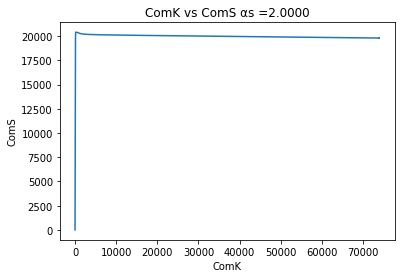

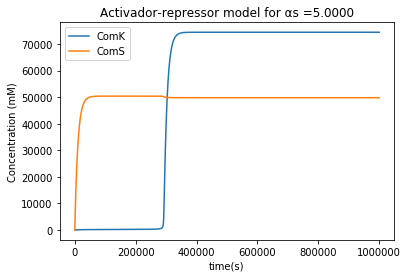

When αs = 5.0000
[ComS] tents to the value:  49800.319
[ComK] tents to the value:  74452.236


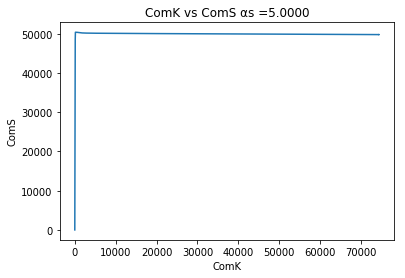

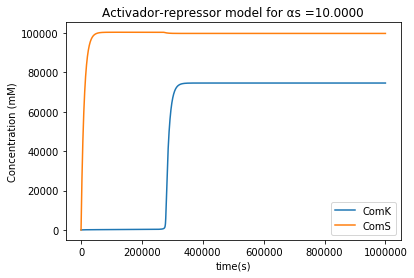

When αs = 10.0000
[ComS] tents to the value:  99800.16
[ComK] tents to the value:  74602.729


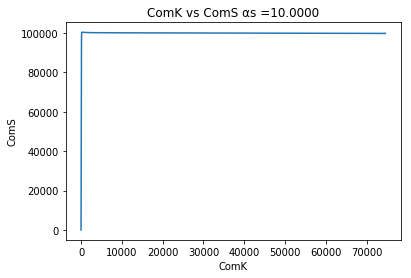

In [14]:
# solve the ODE problem 
a_s1 = [0.004,0.05,0.85,1,2,5,10]

for a_s in a_s1:
    a_k = 0.00875
    bs = 0.06

    y1 = odeint(dK_dS, y0, t, args=(a_k, a_s,bs))
    dK = y1[:, 0]
    dS = y1[:, 1]
    plt.plot(t, dK)
    plt.plot(t, dS)
    plt.xlabel('time(s)')
    plt.ylabel('Concentration (mM)')
    plt.legend(["ComK","ComS"])
    plt.title('Activador-repressor model for αs =%.4f'%a_s)
    plt.show()
    len_yS=len(dS)
    len_yK=len(dK)
    print("When αs = %.4f" %a_s)
    print("[ComS] tents to the value: ", round(float(dS[len_yS-1]),3))
    print("[ComK] tents to the value: ", round(float(dK[len_yK-1]),3))

    plt.plot(dK, dS)
    plt.xlabel('ComK')
    plt.ylabel('ComS')
    plt.title('ComK vs ComS αs =%.4f' % a_s)

    plt.show()
    
    

Observing the behaviour of the system when we change the value of the basal expression rate of ComS, we can notice that raising the value form 0.0004 to 0.8 the concentration of comS increase significantly faster than the concentration of ComK. Once these concentration get its maximum value they stay in a stable state. In other words, they do not change along the time. So, it makes sense that there are not oscillation in the system. However, once the αs is higher than 0.85 the behaviour changes. Now we can see that the concentration of ComK increase sharply from 0 to 74500 nm at a certain moment of time, whereas the concentration of ComS remains the same all the time. Although, we can also notice that the higher is the αs the higher concentration values comes gets while the max concentration of ComK doesn't change, but the time in which comic reach its maximum concentration gets smaller.
In addition, we can notice that the change of the αs does not produce any oscillation state or unstable state. 

### Changing unrepressed expression rate of ComS (βs) variable: <a class="anchor" id="change-bs"></a> 

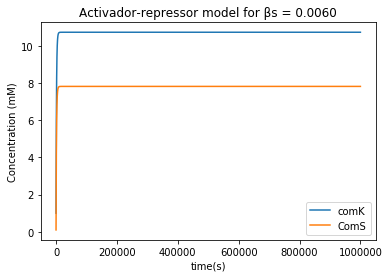

When βs = 0.0060
[ComS] tents to the value:  7.817
[ComK] tents to the value:  10.729


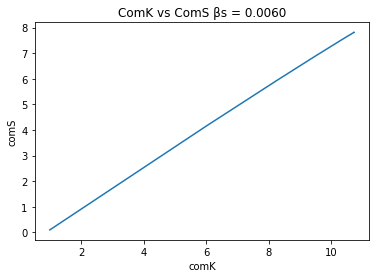

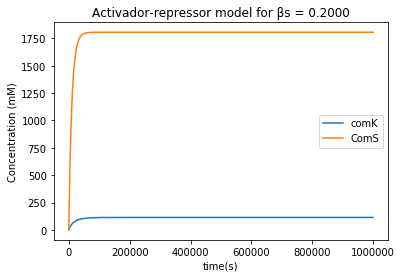

When βs = 0.2000
[ComS] tents to the value:  1806.104
[ComK] tents to the value:  113.96


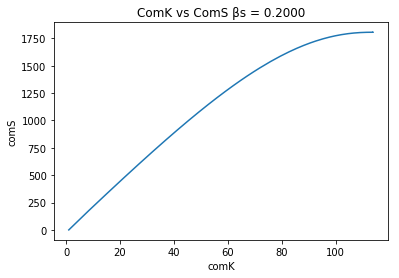

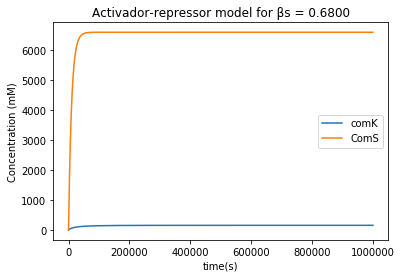

When βs = 0.6800
[ComS] tents to the value:  6603.169
[ComK] tents to the value:  153.365


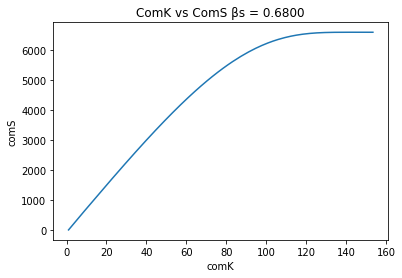

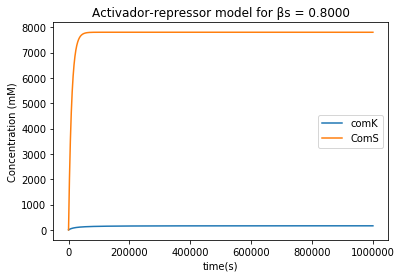

When βs = 0.8000
[ComS] tents to the value:  7802.285
[ComK] tents to the value:  162.067


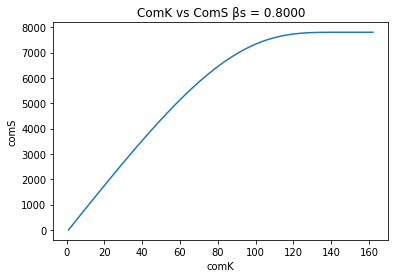

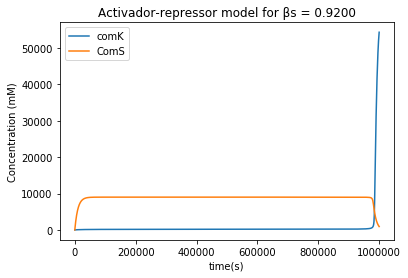

When βs = 0.9200
[ComS] tents to the value:  920.625
[ComK] tents to the value:  54289.4


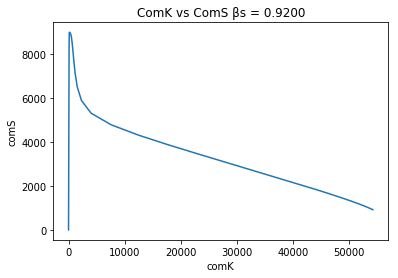

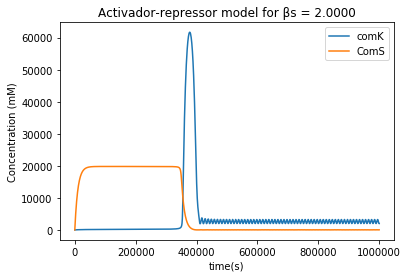

When βs = 2.0000
[ComS] tents to the value:  30.337
[ComK] tents to the value:  2004.644


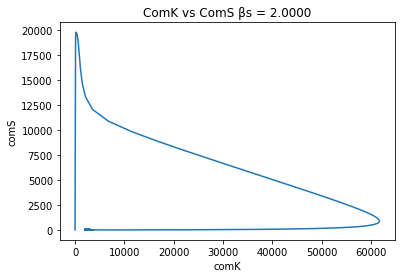

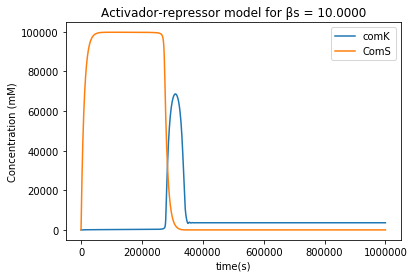

When βs = 10.0000
[ComS] tents to the value:  9.649
[ComK] tents to the value:  3614.644


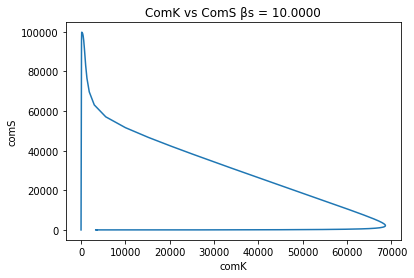

In [15]:
# solve the ODE problem 
bs1 = [0.006,0.2, 0.68,0.8,0.92,2,10]

for bs in bs1:
    a_s = 0.0004
    a_k = 0.00875

    y1 = odeint(dK_dS, y0, t, args=(a_k, a_s,bs))
    dK = y1[:, 0]
    dS = y1[:, 1]
    plt.plot(t, dK)
    plt.plot(t, dS)
    plt.xlabel('time(s)')
    plt.ylabel('Concentration (mM)')
    plt.legend(["comK","ComS"])
    plt.title('Activador-repressor model for βs = %.4f'%bs)
    plt.show()
    len_yS=len(dS)
    len_yK=len(dK)
    print("When βs = %.4f" %bs)
    print("[ComS] tents to the value: ", round(float(dS[len_yS-1]),3))
    print("[ComK] tents to the value: ", round(float(dK[len_yK-1]),3))

    plt.plot(dK, dS)
    plt.xlabel('comK')
    plt.ylabel('comS')
    plt.title('ComK vs ComS βs = %.4f' % bs)

    plt.show()

In the first plot we can see that when we low the βs value the concentration of ComS and ComK decrease significantly, but the first one does it faster than the other one. As we can see that the concentration of ComK get higher values. Also, we can see that the there is not oscillation state, the plot of ComK vs ComS is just a straight line.We can notice that when βs increase its value from 0.06 to 0.92 the concentration of ComS increase extremely fast and the concentration of ComK increase slowly. Within these values the system reaches a steady state without changes and no-oscillation.

However, when βs gets values higher than 0.92 we can start seeing some changes. The concentration of ComK stays lower than ComS but at a certain moment the concentration of ComK increase sharply and as soon as this happens the concentration of ComS drops to the minim. Also, in the following cases we can easily see that this sharp concentration raise happens earlier when βs gets higher values. In addition, we can notice that when βs get higher values such as 2 and 10, the concentration on ComS tends to be higher than ComK from the first period of time and suddenly ComK raises its concentration to its maximum and ComS drops its concentration. Also, it is seen how the concentration of ComK becomes unstable which it can been seen in the oscillation plot how the system is unstable.
We can also say that the pick which is seen in the "ComK vs ComS" plot when βs= 2 and βs= 10 is due to this both changes of concentration.